<a id="CGAN"><h1>Import Header</h1></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/PhD/Development/code/Current/EVAGAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install smote_variants

In [ ]:
import importlib
import header

importlib.reload(header) # For reloading after making changes
from header import *

<a id="CGAN"><h1>Select GAN and Dataset and Flags</h1></a>

In [ ]:
# GAN_type = 'GAN'
# GAN_type = 'CGAN'
# GAN_type = 'WGAN'
# GAN_type = 'WCGAN'
GAN_type = 'EVAGAN_CC'
# GAN_type = 'ACGAN_CV'
# GAN_type = 'EVAGAN_CV'




# DATA_SET = 'ISCX-2014'
DATA_SET = 'CIC-2017'
# DATA_SET = 'CIC-2018'
# DATA_SET = 'UNSW_BotIoT'


# DATA_SET = 'Drebin'

# DATA_SET = 'Darknet'

<a id="GPU Settings"><h2>Set Flags</h2></a>

In [ ]:
begin_from_start = 1
take_chunk = 0
required_epochs = 150

DISPLAY_FEATURES = 0
EVALUATION_PARAMETER = 'Accuracy'
SAVE_ONLY_BOT_DATA = 0
USE_KMEANS_FOR_CLASSIFICATION = 1

BALANCE_THE_DATASET = 1

labels =[]

USE_ONLY_TRAIN_SET = 1

USE_ALL_CLASSIFIERS = 0

ACCU_EVAL_TEST = 0
RCL_EVAL_TEST = 0

VISUAL_TEST_OVERLAPPING = 1

CSV_ONE_BOT = 0

VIEW_ALL_BOTS = 0

CTU_NERIS = 0

SINGLE_WEIGHT_CLASSIFIER_TEST_C2ST = 0
SINGLE_WEIGHT_CLASSIFIER_TEST_PROPOSED_METHODOLOGY = 0

C2ST_BLACK_BOX_TEST = 0
BOTSHOT_BLACK_BOX_TEST = 0

C2ST_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0
BOTSHOT_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0

GENERATE_OTHERS_DATA = 1

<a id="CGAN"><h1>Set Paths</h1></a>

In [ ]:
MAIN_CODE_PATH = os.getcwd()

In [ ]:
DATA_SET_PATH = MAIN_CODE_PATH + '/Dataset/' +  DATA_SET + '/'
CACHE_PATH = MAIN_CODE_PATH + '/cache/' + GAN_type + '/'
FIGS_PATH = MAIN_CODE_PATH  + '/figs/' + GAN_type + '/'

In [ ]:
print(DATA_SET_PATH)
print(CACHE_PATH)
print(FIGS_PATH)

/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/Dataset/CIC-2017/
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/cache/EVAGAN_CC/
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/figs/EVAGAN_CC/


<a id="GPU Settings"><h2>Check Available GPUs</h2></a>

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


<a id="GPU Settings"><h2>Import Dataset</h2></a>

In [ ]:
%cd $DATA_SET_PATH
!ls

/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/Dataset/CIC-2017
 best_losses.csv			  GAN_2contour.eps
 CGAN_data_frame_of_bots_0.csv		  GAN_4contour.eps
 CGAN_data_frame_of_bots_10.csv		  GAN_6contour.eps
 CGAN_data_frame_of_bots_2.csv		  GAN_8contour.eps
 CGAN_data_frame_of_bots_4.csv		  GAN_data_frame_of_bots_0.csv
 CGAN_data_frame_of_bots_6.csv		  GAN_data_frame_of_bots_10.csv
 CGAN_data_frame_of_bots_8.csv		  GAN_data_frame_of_bots_2.csv
 CGAN_losses.csv			  GAN_data_frame_of_bots_4.csv
 CIC_Friday_bot.csv			  GAN_data_frame_of_bots_6.csv
'CIC_Friday_bot.csv_(Preprocessed).csv'   GAN_data_frame_of_bots_8.csv
 GAN_0contour.eps			  GANlosses.csv
 GAN_10contour.eps			  shuffled_T_B.csv


In [ ]:
if begin_from_start:        

    if DATA_SET == 'ISCX-2014':
        training_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv')
        testing_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Testing.pcap_Flow.csv') 
    
    elif DATA_SET == 'CIC-2017':
        training_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
        testing_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
        
    elif DATA_SET == 'CIC-2018':
        training_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
        testing_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
        
    elif DATA_SET == 'UNSW_BotIoT':
        training_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
        testing_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
        
    elif DATA_SET == 'Darknet':
        training_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        testing_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        
        

    print('Dataset preprocessed: ' + DATA_SET)
    
else:

    if DATA_SET == 'ISCX-2014':
        INPUT_TRAINING_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv_VIRUT'
        INPUT_TESTING_FILE_NAME = r'ISCX_Botnet-Testing.pcap_Flow.csv_VIRUT'
        
    elif DATA_SET == 'CIC-2017':
        INPUT_TRAINING_FILE_NAME = r'CIC_Friday_bot.csv'
        INPUT_TESTING_FILE_NAME = r'CIC_Friday_bot.csv'
        
    elif DATA_SET == 'CIC-2018':
        INPUT_TRAINING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
        INPUT_TESTING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
        
    elif DATA_SET == 'BoT-IoT':
        INPUT_TRAINING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'
        INPUT_TESTING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv'
        
    elif DATA_SET == 'Drebin':
        INPUT_TRAINING_FILE_NAME = r'Drebin_API_Dataset.csv'
        INPUT_TESTING_FILE_NAME = r'Drebin_API_Dataset.csv'
        
    elif DATA_SET == 'Darknet':
        INPUT_TRAINING_FILE_NAME = r'Darknet.csv'
        INPUT_TESTING_FILE_NAME = r'Darknet.csv'

    training_data = pd.read_csv (INPUT_TRAINING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    training_data= training_data.drop(['Unnamed: 0'], axis=1)
    
    testing_data = pd.read_csv (INPUT_TESTING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    testing_data= testing_data.drop(['Unnamed: 0'], axis=1) 
    
    print('Dataset Imported: ' + DATA_SET)
    print('Training set: '+ str(training_data.shape))
    print('Testng set: '+ str(training_data.shape))
    


Processing File: CIC_Friday_bot.csv DATA shape: (191033, 78)
Before Preprocesing: Total: (191033, 78)
Before Preprocesing: Normal: (189067, 78)
Before Preprocesing: Bots: (1966, 78)
Data Shape before droping NULL and INF values: 
(191033, 78)
Data Shape after droping NULL and INF values: 
(190911, 78)
data_df after removing Label column
(190911, 77)
 Data Columns after converting to Float
       FlowDuration  TotalFwdPackets  ...       IdleMax       IdleMin
count  1.909020e+05     190911.00000  ...  1.909110e+05  1.909110e+05
mean   1.165298e+07         13.83442  ...  4.050751e+06  3.748148e+06
std    3.070986e+07       1098.10619  ...  1.424541e+07  1.370882e+07
min    1.000000e+00          1.00000  ...  0.000000e+00  0.000000e+00
25%    1.950000e+02          2.00000  ...  0.000000e+00  0.000000e+00
50%    3.113100e+04          2.00000  ...  0.000000e+00  0.000000e+00
75%    4.129102e+05          4.00000  ...  0.000000e+00  0.000000e+00
max    1.200000e+08     207964.00000  ...  1.200

In [ ]:
training_data = training_data.replace([np.inf, -np.inf], np.nan).dropna(how="any").reset_index(drop=True)
print(training_data.describe())

       FlowDuration  TotalFwdPackets  ...       IdleMin         Label
count  72330.000000     72330.000000  ...  72330.000000  72330.000000
mean       0.214622         0.000057  ...      0.048643      0.972957
std        0.353401         0.000263  ...      0.116318      0.162209
min        0.000000         0.000000  ...      0.000000      0.000000
25%        0.000002         0.000000  ...      0.000000      1.000000
50%        0.009819         0.000024  ...      0.000000      1.000000
75%        0.291335         0.000063  ...      0.066270      1.000000
max        1.000000         0.028342  ...      1.000000      1.000000

[8 rows x 68 columns]


<a id="GPU Settings"><h2>Display Features</h2></a>

In [ ]:
if DISPLAY_FEATURES: 
    unified_df = training_data.copy()
    X_cols = unified_df.columns[:-1]
    y_cols = unified_df.columns[-1]



    axarr = [[]]*len(X_cols)
    columns = 4
    rows = int( np.ceil( len(X_cols) / columns ) )
    f, fig = plt.subplots( figsize=(columns*2.5, rows*2) )

    f.suptitle('Data Distributions by Feature and Label', size=16)

    for i, col in enumerate(X_cols[:]):
        axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )


        axarr[i].hist( unified_df.loc[ unified_df.Label == 0, col ] , label=['Normal'], color=('#009933'), alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].hist( unified_df.loc[ unified_df.Label == 1, col ] , label=['Real Bot'], color=['#FF0000'], alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].set_xlabel(col, size=12)
    #     axarr[i].set_ylim([0,1])
        axarr[i].tick_params(axis='both', labelsize=10)
        if i == 0: 
            legend = axarr[i].legend()
            legend.get_frame().set_facecolor('white')
        if i%4 != 0 : 
            axarr[i].tick_params(axis='y', left=True, labelleft=True)
        else:
            axarr[i].set_ylabel('Fraction',size=12)

    plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
    # plt.savefig('plots/Engineered_Data_Distributions.png')

    plt.show()
    
# else: 
#     print('Pair Plotting..')
# #     sns.pairplot(training_data, hue="Label")
    
#     sns.pairplot(training_data, vars=['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
#        'Total Length of Fwd Packet', 'Total Length of Bwd Packet'], hue="Label")
    
#     sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])

<a id="GPU Settings"><h2>Select Botnet</h2></a>

In [ ]:
bots = training_data.loc[ training_data['Label']==0 ].copy()
normal = training_data.loc[ training_data['Label']==1 ].copy()

print('Normal before chunk: ' + str(normal.shape))    
print('Real Bots before chunk: ' + str(bots.shape)) 

if take_chunk:
    bots = bots[0:512]
    
print('Normal: ' + str(normal.shape))    
print('Real Bots: ' + str(bots.shape)) 

Normal before chunk: (70374, 68)
Real Bots before chunk: (1956, 68)
Normal: (70374, 68)
Real Bots: (1956, 68)


In [ ]:
Train = training_data.copy()

In [ ]:
bots_count =  pd.DataFrame( [ [np.sum(bots['Label']==i)] for i in np.unique(bots['Label']) ], columns=['count'], index=np.unique(bots['Label']) )

label_cols = [ i for i in bots.columns if 'Label' in i ]
data_cols = [ i for i in bots.columns if i not in label_cols ]

train_no_label = bots[ data_cols ].reset_index(drop=True)

print(bots_count['count'])

0    1956
Name: count, dtype: int64


In [ ]:
train_data = bots

<a id="Classification"><h1>Classification</h1></a>

1956
CPU times: user 189 ms, sys: 86.1 ms, total: 275 ms
Wall time: 177 ms


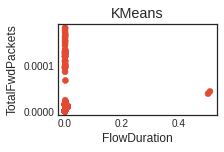

In [ ]:
%%time 
# if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
if USE_KMEANS_FOR_CLASSIFICATION:
    algorithms = [ 
    #     [ 'KMeans', cluster.KMeans, (), {'random_state':0} ],
        [ 'KMeans', cluster.KMeans, (), {'n_clusters':1, 'random_state':0} ],
    #     [ 'KMeans 3', cluster.KMeans, (), {'n_clusters':3, 'random_state':0} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {'linkage': 'ward', 'n_clusters': 3} ],
    #     [ 'Agg. Ave 3', cluster.AgglomerativeClustering, (), {'linkage': 'average', 'n_clusters': 3} ],
    #     [ 'Agg. Complete 3', cluster.AgglomerativeClustering, (), {'linkage': 'complete', 'n_clusters': 3} ],
    #     [ 'DBSCAN', cluster.DBSCAN, (), {'eps':0.025} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':1, } ],
    #     [ 'HDBSCAN 2 10', hdbscan.HDBSCAN, (), {'min_cluster_size':2, 'min_samples':10, } ],
    #     [ 'HDBSCAN 10 10 ', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':10, } ],
    ]

    rows = len(algorithms)
    columns = 1
    fig, ax = plt.subplots(3, 2, figsize=(3, 2),
                            constrained_layout=True)

    for i, [name, algorithm, args, kwds] in enumerate(algorithms):

        labels = algorithm(*args, **kwds).fit_predict(train_no_label)
        print(len(labels))
        colors = np.clip(labels,-1,9)
        colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

        plt.subplot(rows,columns,i*columns+1)
        plt.scatter(train_no_label[data_cols[0]], train_no_label[data_cols[1]], c=colors)
        plt.xlabel(data_cols[0]), plt.ylabel(data_cols[1])
        plt.title(name)
            

#     else:
#         labels = train_bots_only['Label'].values.tolist() 
#         sns.set(style="ticks", color_codes=True) # Remove background and grid

#     #     g = sns.scatterplot(data_cols[0],data_cols[1], data=train, hue=labels)

#     #     plt.show() 


#         plt.figure()
#         ax = sns.countplot(y="Label", data=train_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 2700 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Trainset.pdf', dpi=600)
#         plt.show()




#         plt.figure(figsize=(6, 6))
#         ax = sns.countplot(y="Label", data=test_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 6000 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Testset.pdf', dpi=600)
#         plt.show()

#     #     g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count", height=4, aspect=.7);


#     #     sns.pairplot(data=train, vars=[data_cols[0], data_cols[1]], hue='Label')


#     # plt.grid(False)
#     # plt.show()
#     print(train_no_label.describe())
    
    botnet_w_classes = train_no_label.copy()
    botnet_w_classes['Label'] = labels

#     print(botnet_w_classes.describe())
    train_data = botnet_w_classes
    
# else:
#     train_data = train_no_label


In [ ]:
train_data['Label']

0       0
1       0
2       0
3       0
4       0
       ..
1951    0
1952    0
1953    0
1954    0
1955    0
Name: Label, Length: 1956, dtype: int32

<a id="GPU Settings"><h2>GAN Training</h2></a>

In [ ]:
# import header
# import importlib
# importlib.reload(header) # For reloading after making changes
# from header import *


gpu_device = '/device:GPU:2'
physical_devices = tf.config.list_physical_devices('GPU') 
for gpu_instance in physical_devices: 
    tf.config.experimental.set_memory_growth(gpu_instance, True)

#----------------------------------
# Set neurons and batch size
#----------------------------------
if GAN_type == 'GAN':
    base_n_count = 256
    batch_size =  128
elif GAN_type == 'CGAN':
    base_n_count = 256
    batch_size =  128
elif GAN_type == 'WGAN':
    base_n_count = 128
    batch_size =  256
elif GAN_type == 'WCGAN':
    base_n_count = 128
    batch_size =  128
    
elif GAN_type == 'EVAGAN_CC':
    base_n_count = 256
    batch_size =  256
    
elif GAN_type == 'ACGAN_CC':
    base_n_count = 256
    batch_size =  256
    
elif GAN_type == 'ACGAN_CV':
    base_n_count = 32
    batch_size =  32
    
elif GAN_type == 'EVAGAN_CV':
    base_n_count = 256
    batch_size =  256
#----------------------------------


result = train_data

remaining = train_data.shape[0] % batch_size

if remaining > 0:
    if remaining < train_data.shape[0]:
        additional = batch_size - remaining
        _additional = train_data.loc[train_data.shape[0]-additional:train_data.shape[0],: ]  
        
        frames = [train_data, _additional]
        result = pd.concat(frames).reset_index(drop=True)

print('Result: ' + str(result.shape))
# ---------------------------------
nb_steps = required_epochs * result.shape[0] // batch_size

log_interval = result.shape[0] // batch_size # We are setting this as an epoch. This depends on data size.

print("log_interval : " + str(log_interval))

# nb_steps = TRAINING_ITERATIONS  # 50000 # Add one for logging of the last interval
print("Total Batch Iterations: " + str(nb_steps))
rand_noise_dim = 100 


k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step

critic_pre_train_steps = 100# 100  # number of steps to pre-train the critic before starting adversarial training

generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True 
train = result#.copy().reset_index(drop=True) # botnet only with labels from classification



label_cols = [ i for i in train.columns if 'Label' in i ]

data_cols = [ i for i in train.columns if i not in label_cols ]

print(data_cols)

train_no_label = train[ data_cols ]

train_no_label = round(train_no_label, 4)

# if SAVE_ONLY_BOT_DATA:
#     train_no_label.to_csv(str(DATA_SET_PATH) + 'ONLY_BOTNET_DATA_(Preprocessed).csv')
#     print('File: ' + 'ONLY_BOTNET_DATA_(Preprocessed).csv saved to directory')   



test_size = train.shape[0] 
learning_rate = 5e-4

for X in range(1):

    TODAY = DATA_SET + '_' + str(datetime.datetime.now()) 

    print(TODAY)

    Test = testing_data.copy()

    arguments = [rand_noise_dim, nb_steps, batch_size, 
                k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
                CACHE_PATH, FIGS_PATH, show, test_size, gpu_device, EVALUATION_PARAMETER, TODAY ]

    if GAN_type == 'GAN':
        best_losses = adversarial_training_GAN(arguments, train_no_label, data_cols) # GAN    
    elif GAN_type == 'CGAN':    
        best_losses = adversarial_training_CGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN      
    elif GAN_type == 'WGAN':
        best_losses = adversarial_training_WGAN(arguments, train_no_label, data_cols) # WGAN    
    elif GAN_type == 'WCGAN':    
        best_losses = adversarial_training_WCGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN      


    # if GAN_type == 'WGAN':
    #     best_losses = train_WGAN(arguments, train_no_label, data_cols)

    # elif GAN_type == 'GAN':
    #     best_losses = train_GAN(arguments, train_no_label, data_cols)


    elif GAN_type == 'EVAGAN_CC':   

        best_losses = train_EVAGAN_CC(arguments, train, Train, Test, data_cols)

    elif GAN_type == 'EVAGAN_CV':   

        best_losses = train_EVAGAN_CV(arguments, train, Train, Test, data_cols)



    elif GAN_type == 'ACGAN_CC':   

        best_losses = train_ACGAN_CC(arguments, train, Train, Test, data_cols)

    elif GAN_type == 'ACGAN_CV':   

        best_losses = train_ACGAN_CV(arguments, train, Train, Test, data_cols)




Result: (2048, 68)
log_interval : 8
Total Batch Iterations: 1200
['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets', 'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'ECEFlagCount', 'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'SubflowFwdPackets',